In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mfn.bootstrap import lbb
from mfn.entropy import MFN

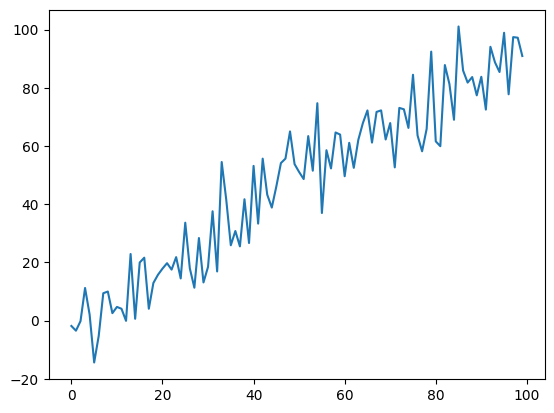

In [2]:
## Generating a time series with trend and noise.
time_series = np.arange(0, 100, 1)
time_series = time_series + np.random.normal(0, 10, size=len(time_series))
plt.plot(time_series)

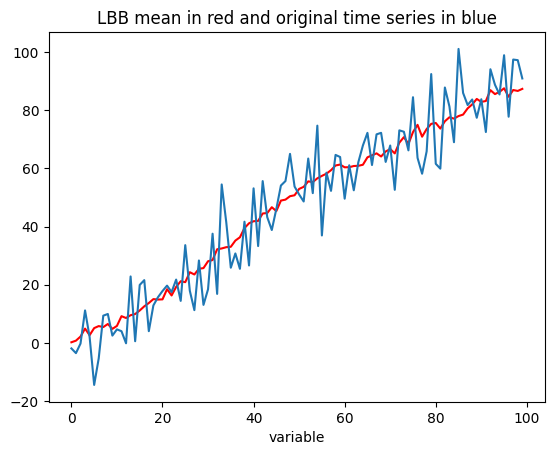

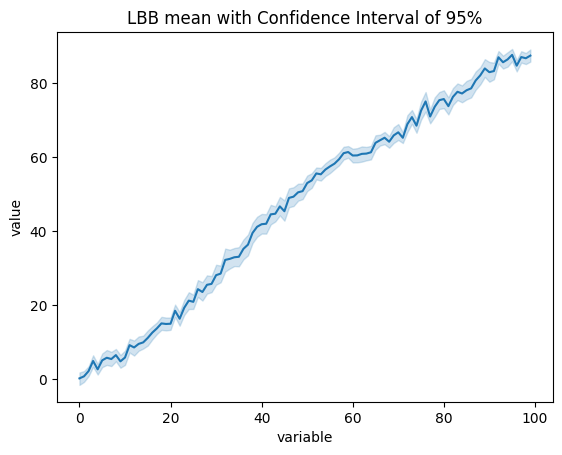

In [23]:
# generating the LBB samples
lbb_samples = lbb(
    time_series,
    b=10,
    B=.1,
    size=100
)
lbb_df = pd.DataFrame(lbb_samples).reset_index()
lbb_df = lbb_df.melt(id_vars='index', value_vars=lbb_df.columns[1:])

# Plotting the mean of the LBB samples
lbb_df.groupby("variable").agg("mean")["value"].plot(color="red")
plt.plot(time_series)
plt.title("LBB mean in red and original time series in blue")
plt.show()

# Plotting the mean of the LBB samples with confidence interval
sns.lineplot(
    lbb_df,
    x='variable', y='value',
    err_style="band", errorbar=("ci", 95), estimator="mean",   
)
plt.title("LBB mean with Confidence Interval of 95%")
plt.show()

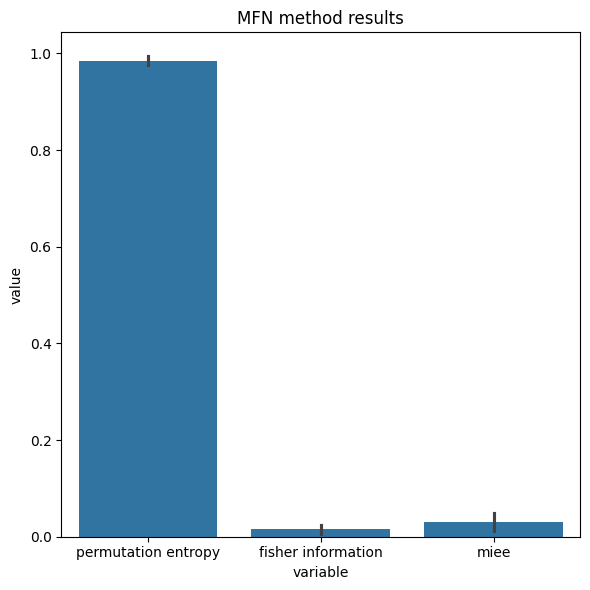

In [5]:
value_dict = MFN(
    time_series,
    b=10,
    B=.1,
    size=100,
    dx=3
)

f, ax = plt.subplots(figsize=(6, 6))
value_df = pd.DataFrame(value_dict).reset_index()
value_df = value_df.melt(id_vars='index', value_vars=value_df.columns[1:])
sns.barplot(value_df, x='variable', y='value', errorbar="sd")
plt.title("MFN method results")
f.tight_layout()